In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys
import scipy


sc.set_figure_params(figsize=(4, 4))

In [2]:
def Barplot(which_var, adata, var='clusters', height=3, color = False):
    plotdata = pd.crosstab(adata.obs[var], adata.obs[which_var], normalize='index') * 100
    if 'category' in plotdata.index.dtype.name:
        plotdata.index.reorder_categories(adata.obs[var].cat.categories[::-1])

    if not color:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False)
    else:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False, color = color)
    ax1.set_title(which_var+' %')
    ax1.set_ylabel(var)
    horiz_offset = 1
    vert_offset = 1.
    ax1 = ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset))
#     ax1.figure.savefig(str(sc.settings.figdir)+'/barplot_'+var+'_proportions_'+which_var+'.pdf', bbox_inches='tight',
#                        dpi=300, orientation='landscape', format= 'pdf', optimize=True)

# SOMATIC early

### Read in dataset

In [3]:
path_to_gonads = '/nfs/team292/lg18/with_valentina/gonadsV2_revision/'

In [4]:
adata = sc.read(path_to_gonads + 'FCA-gonads_rawcounts.h5ad')

## Annotate cells

In [5]:
# Add old cluster subname
metaF = pd.read_csv(path_to_gonads+'/FCA-gonads_female_annotated.csv')
metaF = metaF.set_index('Unnamed: 0')
metaF.head()

metaM = pd.read_csv(path_to_gonads+'/FCA-gonads_male_annotated.csv')
metaM = metaM.set_index('Unnamed: 0')
metaM.head()


cell_annotM = metaM['lineage'].to_dict()
cell_annotF = metaF['lineage'].to_dict()
cell_annot = {**cell_annotM , **cell_annotF}
adata.obs['lineage'] = adata.obs_names.map(cell_annot).astype('category')

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (29,30,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# Add old cluster subname
meta = pd.read_csv(path_to_gonads+'FCA-gonads_somaticEarly_annotated.csv')
meta = meta.set_index('Unnamed: 0')
meta.head()

cell_annot = meta['celltype'].to_dict()
adata.obs['celltype_somaticEarly'] = adata.obs_names.map(cell_annot).astype('category')

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (29,30,31,32,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
# Add old cluster subname
metaF = pd.read_csv(path_to_gonads+'/old/FCA-gonads_scVI_supporting_1stEarly.csv')
metaF = metaF.set_index('Unnamed: 0')
metaF.head()

metaM = pd.read_csv(path_to_gonads+'/old/FCA-gonads_scVI_supporting_late.csv')
metaM = metaM.set_index('Unnamed: 0')
metaM.head()


cell_annotM = metaM['celltype'].to_dict()
cell_annotF = metaF['celltype'].to_dict()
cell_annot = {**cell_annotM , **cell_annotF}
adata.obs['celltype_v2'] = adata.obs_names.map(cell_annot).astype('category')

In [8]:
adata.obs['lineage'].values.describe()

counts     freqs
categories                         
CoelEpi             24458  0.061675
Doublet              5821  0.014679
Endothelial         14484  0.036524
Epithelial          20222  0.050993
Erythroid            1371  0.003457
FetalLeydig          2426  0.006118
GermCells           14516  0.036604
Immune               5533  0.013952
Mesenchymal_GATA2   84229  0.212396
Mesenchymal_LHX9    66077  0.166623
Neural               3783  0.009539
PV                  12679  0.031972
SMCs                 3044  0.007676
Sertoli             34969  0.088180
Supporting          28124  0.070919
cont                 1432  0.003611
lowQC               34516  0.087037
preGranulosa        38881  0.098044

In [9]:
adata = adata[[i not in ['lowQC', 'Doublet'] for i in adata.obs.celltype_somaticEarly]]
adata = adata[[i in ['Supporting', 'Sertoli', 'CoelEpi', 'Mesenchymal_LHX9', 'FetalLeydig', 'preGranulosa'] for i in adata.obs.lineage]]
adata.X.shape

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


(194104, 28820)

In [10]:
adata.obs['lineage'].values.describe()

counts     freqs
categories                        
CoelEpi            23924  0.123254
FetalLeydig         2426  0.012498
Mesenchymal_LHX9   65978  0.339911
Sertoli            34969  0.180156
Supporting         27931  0.143897
preGranulosa       38876  0.200284

In [11]:
adata.obs['celltype_somaticEarly'].values.describe()

counts     freqs
categories                            
CoelEpi_GATA2           3505  0.018057
CoelEpi_LHX9            2181  0.011236
CoelEpi_LHX9_cycling    1607  0.008279
Gi                      1769  0.009114
Sertoli                   85  0.000438
early_sPAX8             1955  0.010072
early_somatic           2712  0.013972
early_supporting        1892  0.009747
preGC_I                  921  0.004745
NaN                   177477  0.914340

In [12]:
sc.pp.filter_genes(adata, min_counts=5)

Trying to set attribute `.var` of view, copying.
/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [13]:
print('Total number of cells: {:d}'.format(adata.n_obs))
print('Total number of genes: {:d}'.format(adata.n_vars))

Total number of cells: 194104
Total number of genes: 25883


### Identify HVGs

In [14]:
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=2000,
    subset=False,
    flavor="seurat_v3"
)

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:144: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  df.loc[: int(n_top_genes), 'highly_variable'] = True


In [15]:
# subset object for latter
bdata = adata[:, adata.var['highly_variable']]
bdata.layers["counts"] = bdata.X.copy() # preserve counts

## Normalize

In [16]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

### Load latent space scVI

In [17]:
X_scVI = pd.read_csv(path_to_gonads+'/FCA-gonads_XscVI_latent_somatic.csv', index_col=0)
adata.obsm["X_scVI"] = X_scVI.to_numpy()

### Clustering

In [18]:
# use scVI latent space for UMAP generation
sc.pp.neighbors(adata, use_rep="X_scVI")
sc.tl.umap(adata, min_dist=0.3, spread = 1.1)

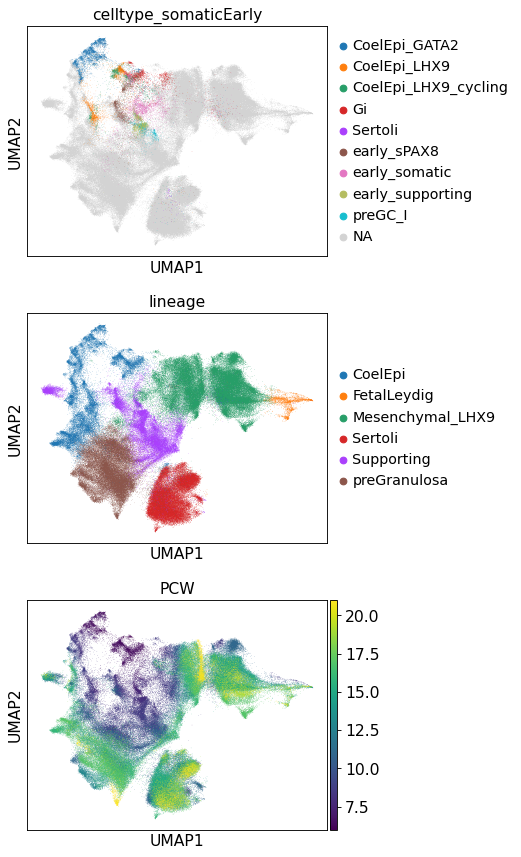

In [19]:
sc.pl.umap(
    adata,
    color=['celltype_somaticEarly',  "lineage", 'PCW'], 
    frameon=True, ncols = 1, wspace = 0.3
)

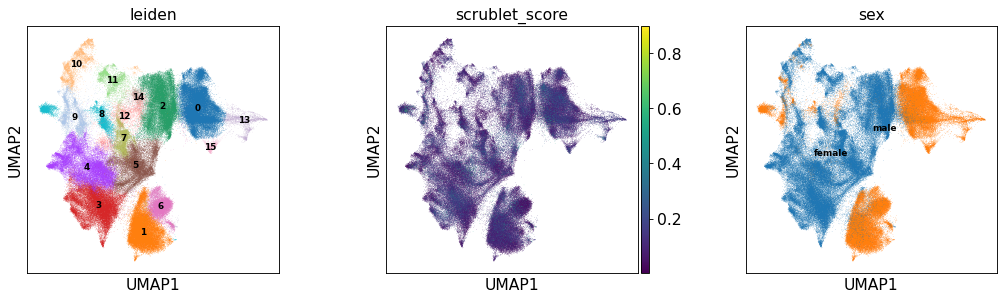

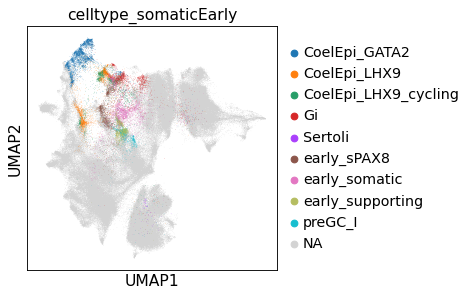

In [20]:
sc.tl.leiden(adata, resolution=1)
sc.pl.umap(
    adata,
    color=['leiden', 'scrublet_score', 'sex'], legend_loc='on data',legend_fontsize=8, ncols = 3,
    frameon=True,  wspace = 0.3
)
sc.pl.umap(
    adata,
    color=['celltype_somaticEarly'], 
    frameon=True, ncols = 1, wspace = 0.3
)

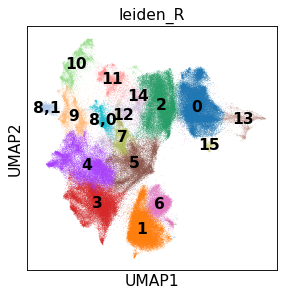

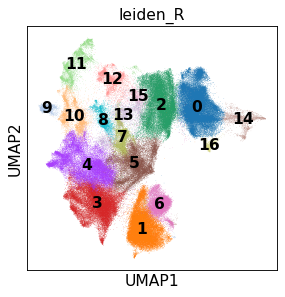

In [21]:
# isolate sPAX8
sc.tl.leiden(adata, resolution=0.2, restrict_to=('leiden', ['8']))
sc.pl.umap(adata, color='leiden_R',legend_loc='on data')
adata.obs['leiden_R'].cat.categories = [str(i) for i in range(len(adata.obs['leiden_R'].cat.categories))]
sc.pl.umap(adata, color='leiden_R',legend_loc='on data')
adata.obs['leiden'] = adata.obs['leiden_R']

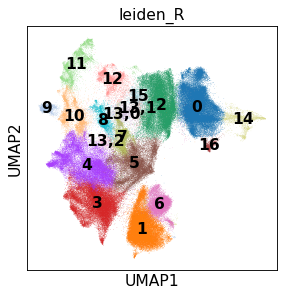

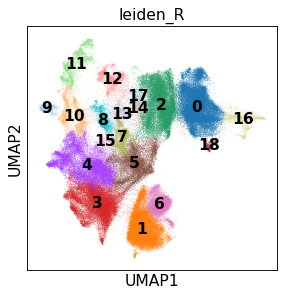

In [22]:
# isolate early_somatic
sc.tl.leiden(adata, resolution=0.25, restrict_to=('leiden', ['13']))
sc.pl.umap(adata, color='leiden_R',legend_loc='on data')
adata.obs['leiden_R'].cat.categories = [str(i) for i in range(len(adata.obs['leiden_R'].cat.categories))]
sc.pl.umap(adata, color='leiden_R',legend_loc='on data')
adata.obs['leiden'] = adata.obs['leiden_R']

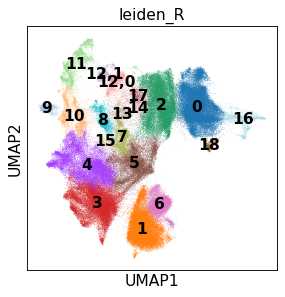

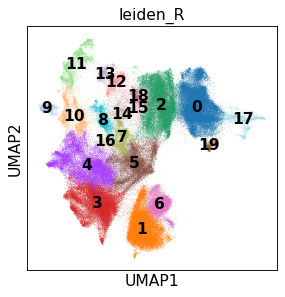

In [23]:
# isolate early Gi
sc.tl.leiden(adata, resolution=0.175, restrict_to=('leiden', ['12']))
sc.pl.umap(adata, color='leiden_R',legend_loc='on data')
adata.obs['leiden_R'].cat.categories = [str(i) for i in range(len(adata.obs['leiden_R'].cat.categories))]
sc.pl.umap(adata, color='leiden_R',legend_loc='on data')
adata.obs['leiden'] = adata.obs['leiden_R']

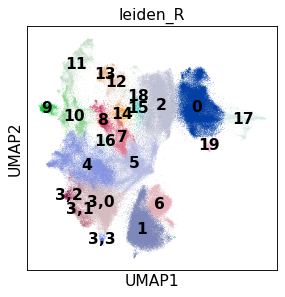

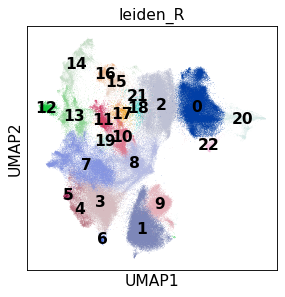

In [24]:
# isolate granulosa
sc.tl.leiden(adata, resolution=0.2, restrict_to=('leiden', ['3']))
sc.pl.umap(adata, color='leiden_R',legend_loc='on data')
adata.obs['leiden_R'].cat.categories = [str(i) for i in range(len(adata.obs['leiden_R'].cat.categories))]
sc.pl.umap(adata, color='leiden_R',legend_loc='on data')
adata.obs['leiden'] = adata.obs['leiden_R']

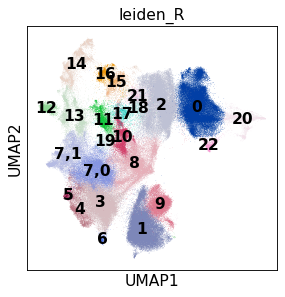

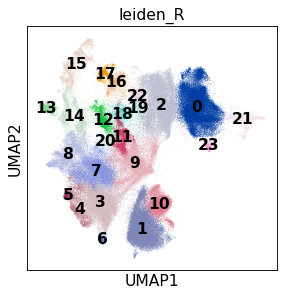

In [25]:
# isolate OSE
sc.tl.leiden(adata, resolution=0.2, restrict_to=('leiden', ['7']))
sc.pl.umap(adata, color='leiden_R',legend_loc='on data')
adata.obs['leiden_R'].cat.categories = [str(i) for i in range(len(adata.obs['leiden_R'].cat.categories))]
sc.pl.umap(adata, color='leiden_R',legend_loc='on data')
adata.obs['leiden'] = adata.obs['leiden_R']

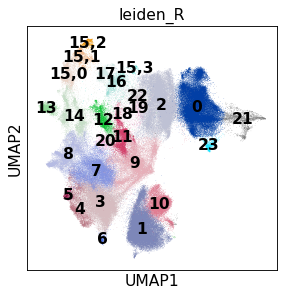

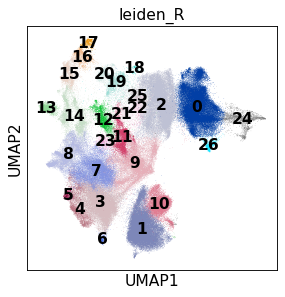

In [29]:
# isolate contaminant mesenchymal_GATA2
sc.tl.leiden(adata, resolution=0.15, restrict_to=('leiden', ['15']))
sc.pl.umap(adata, color='leiden_R',legend_loc='on data')
adata.obs['leiden_R'].cat.categories = [str(i) for i in range(len(adata.obs['leiden_R'].cat.categories))]
sc.pl.umap(adata, color='leiden_R',legend_loc='on data')
adata.obs['leiden'] = adata.obs['leiden_R']

## Annotate clusters

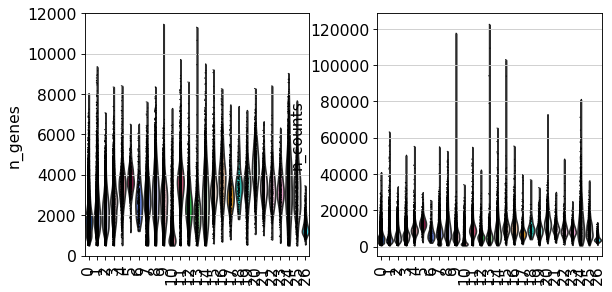

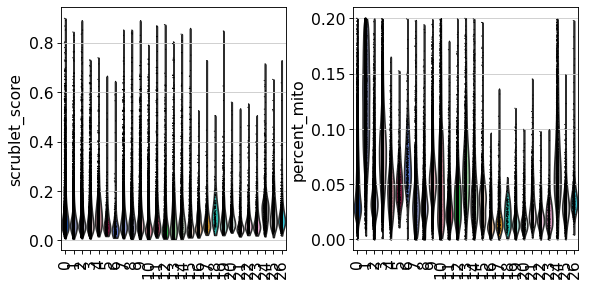

In [30]:
# identify lowQC
sc.pl.violin(adata, ['n_genes', 'n_counts'], groupby='leiden_R', rotation=90)
sc.pl.violin(adata, ['scrublet_score', 'percent_mito'], groupby='leiden_R', rotation=90)

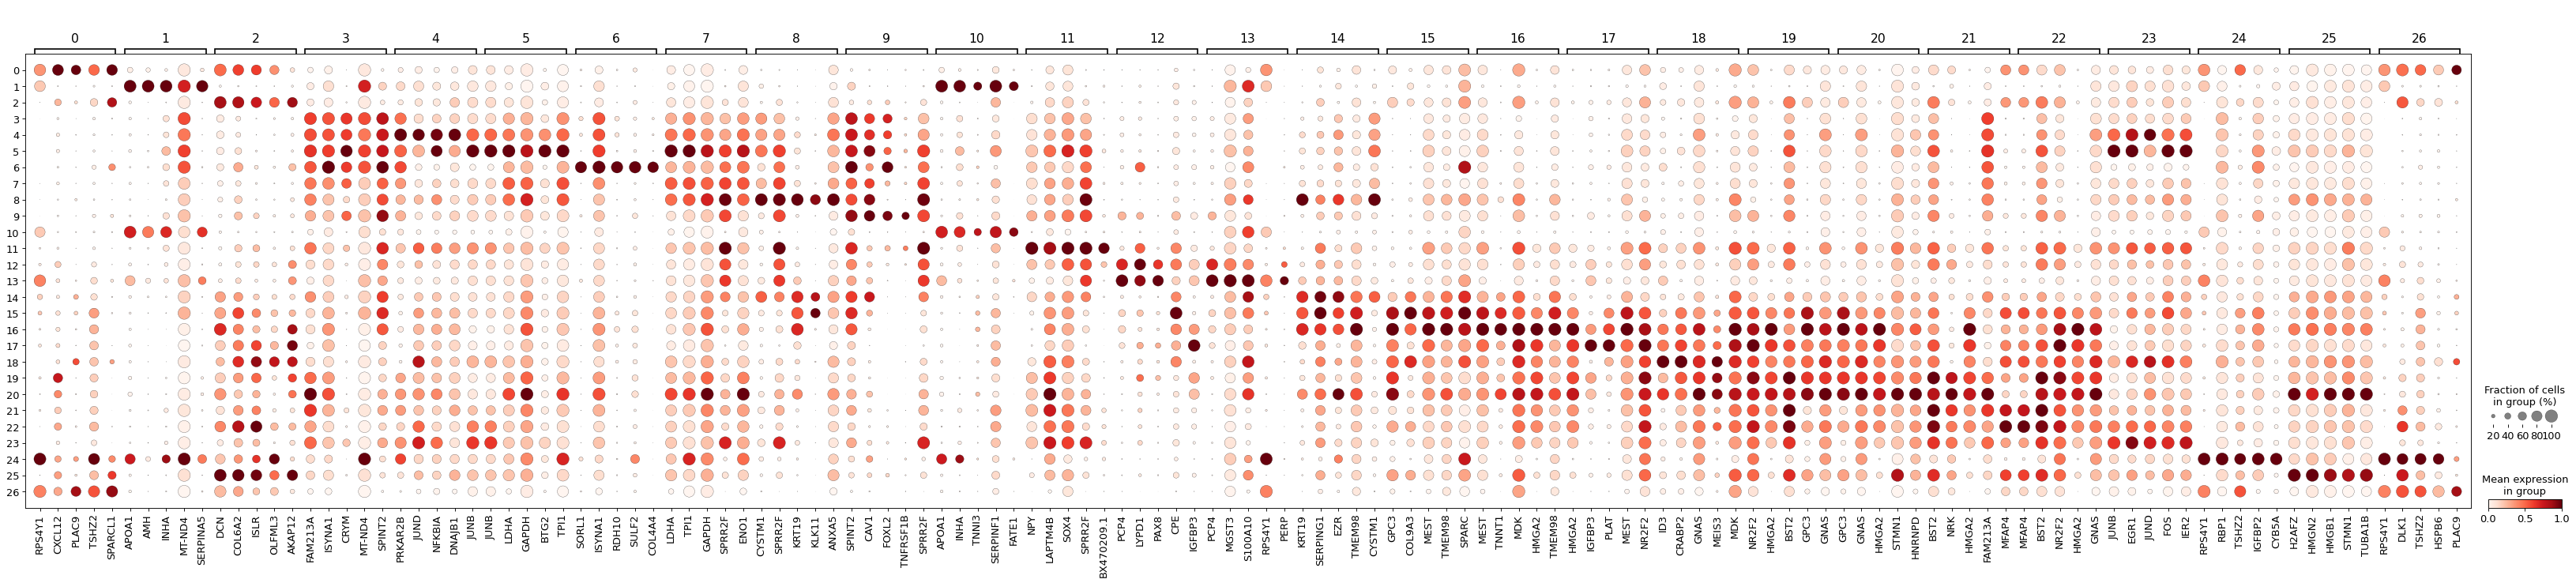

In [31]:
bdata.obs['leiden'] = adata.obs['leiden']
sc.tl.rank_genes_groups(bdata, groupby='leiden', use_raw=False) #, method='logreg'
sc.pl.rank_genes_groups_dotplot(bdata, n_genes=5, dendrogram=False, use_raw = False, standard_scale = 'var')

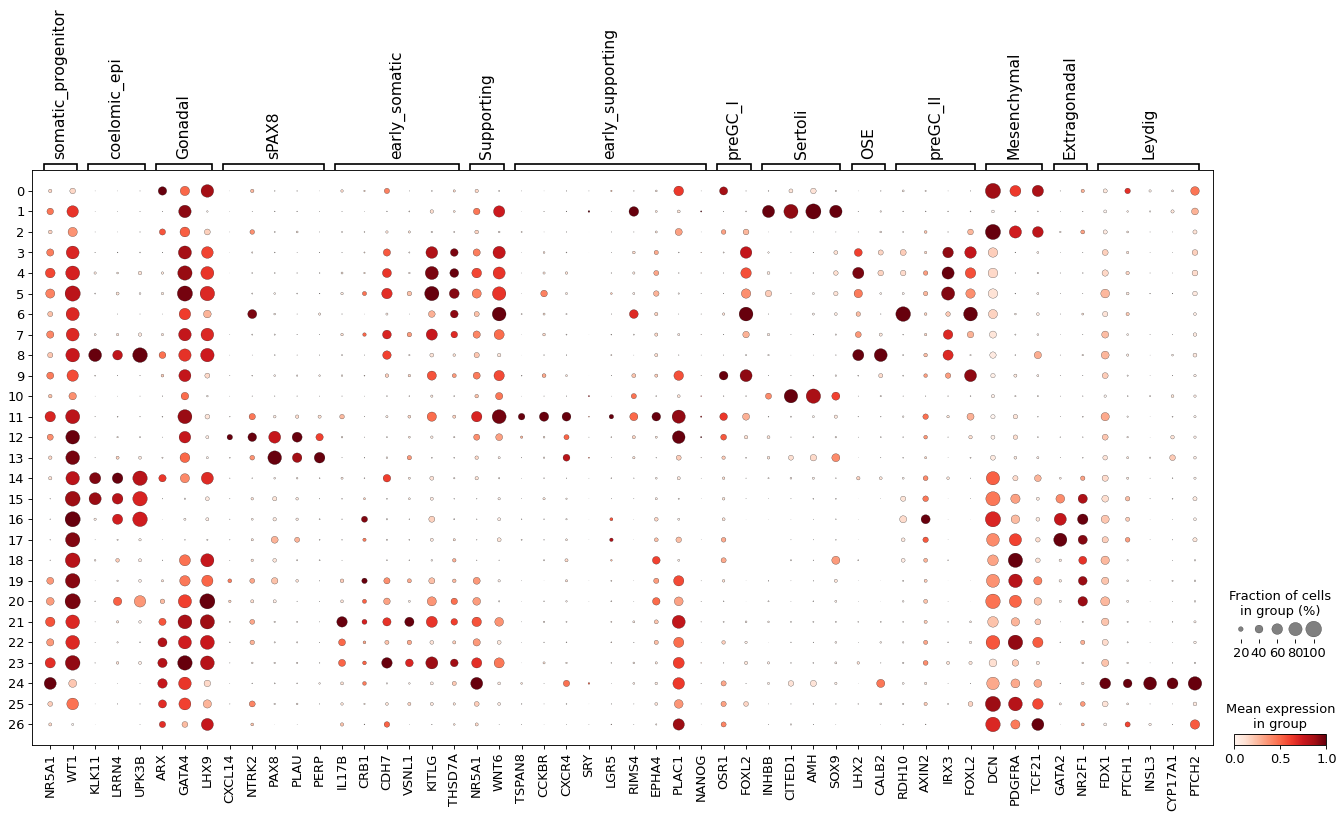

In [32]:
marker_genes = {
    'somatic_progenitor':{'WT1', 'NR5A1'},
    'coelomic_epi': {'LRRN4', 'UPK3B', 'KLK11'},
    'Gonadal':{'LHX9', 'GATA4', 'ARX'},
    'sPAX8': {'PAX8', 'PLAU', 'PERP', 'NTRK2',  'CXCL14'},
    'early_somatic': {'IL17B', 'KITLG', 'VSNL1', 'CDH7' ,'CRB1', 'THSD7A'},
    'Supporting':{"WNT6", 'NR5A1'},
    'early_supporting':{'LGR5', 'TSPAN8', 'SRY', 'PLAC1', 'EPHA4', 'CXCR4','NANOG',  'RIMS4', 'CCKBR'},
    'preGC_I':{'OSR1', 'FOXL2'},
    'Sertoli': {'AMH', 'CITED1',  'INHBB','SOX9'},
    'OSE':{'LHX2', 'CALB2'},
    'preGC_II':{'FOXL2', "IRX3", "RDH10", 'AXIN2'},
    'Mesenchymal':{'DCN', 'PDGFRA', 'TCF21'},
    'Extragonadal':{'NR2F1', 'GATA2'},
    'Leydig':{'FDX1', 'INSL3',  'PTCH1',  'PTCH2', 'CYP17A1'}
}
sc.pl.dotplot(adata, marker_genes, groupby='leiden', standard_scale = 'var')


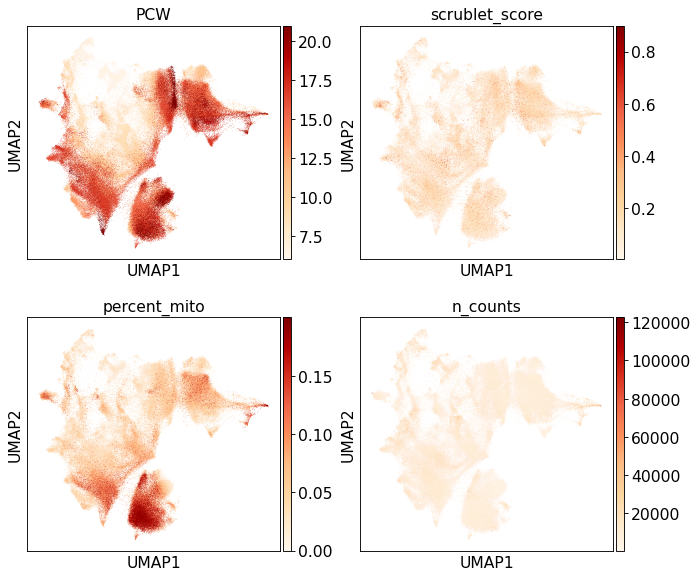

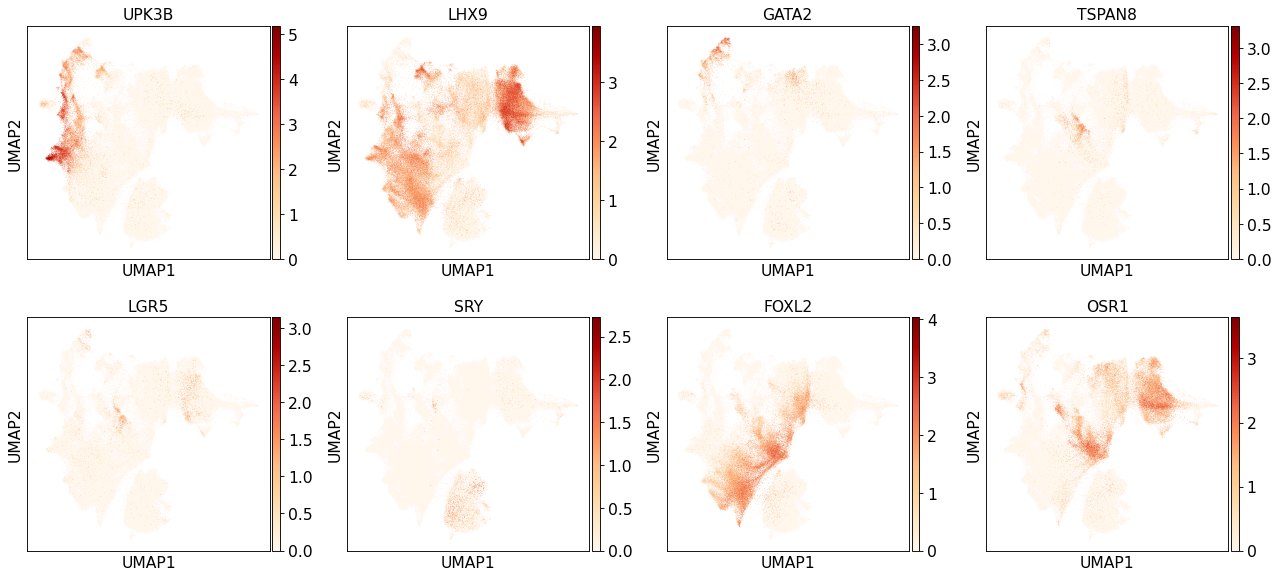

In [33]:
sc.pl.umap(
    adata,
    color=['PCW', 'scrublet_score',  'percent_mito', 'n_counts'], color_map = "OrRd",
    frameon=True, ncols = 2, wspace = 0.2
)

sc.pl.umap(
    adata,
    color=[ 'UPK3B', 'LHX9', 'GATA2','TSPAN8', 'LGR5', 'SRY', 'FOXL2', 'OSR1'], color_map = "OrRd",
    frameon=True, ncols = 4, wspace = 0.2
)

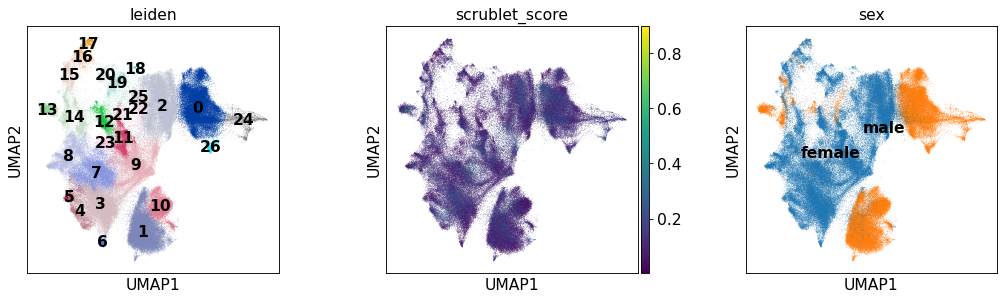

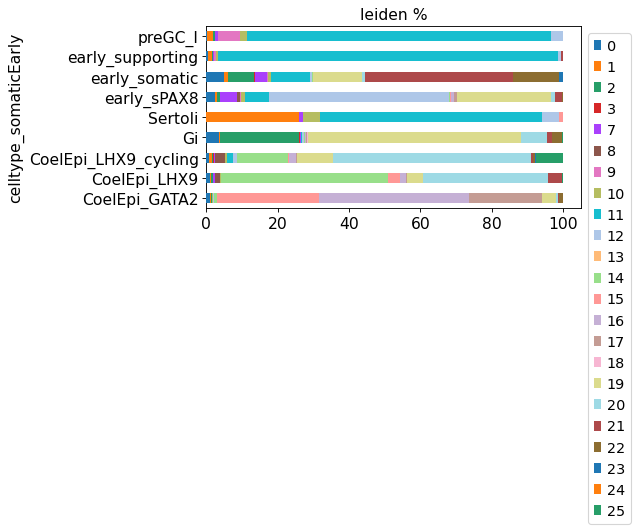

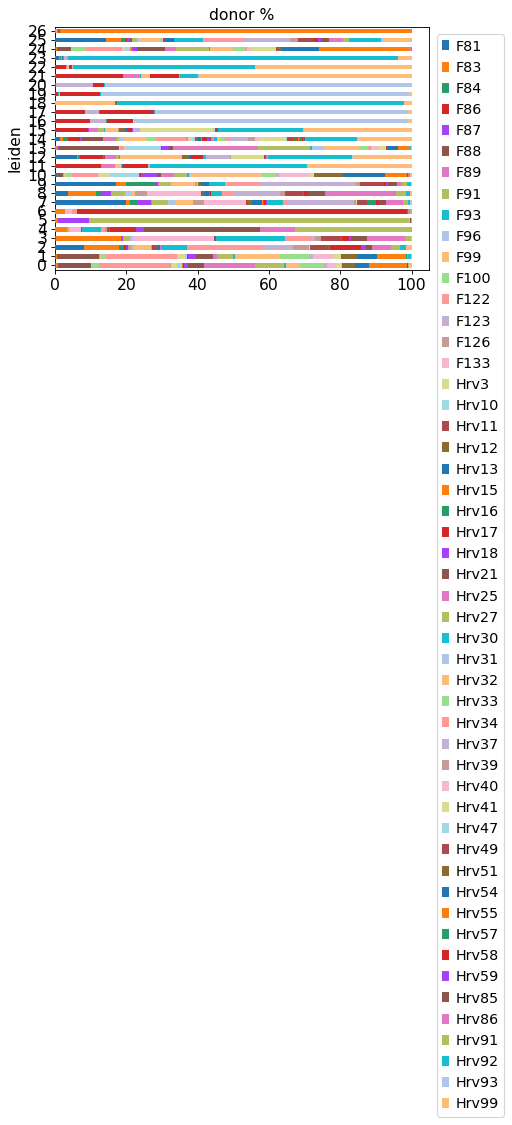

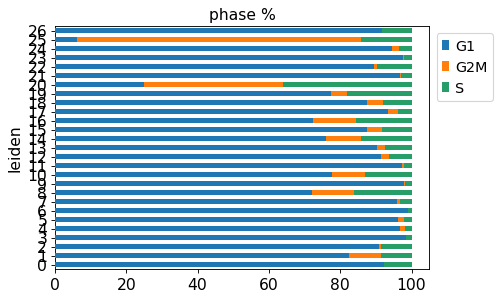

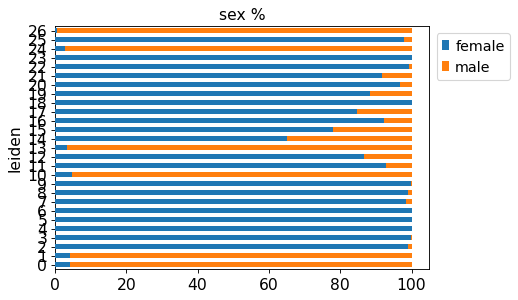

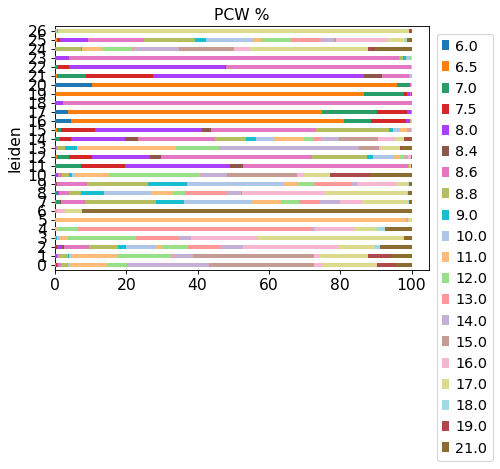

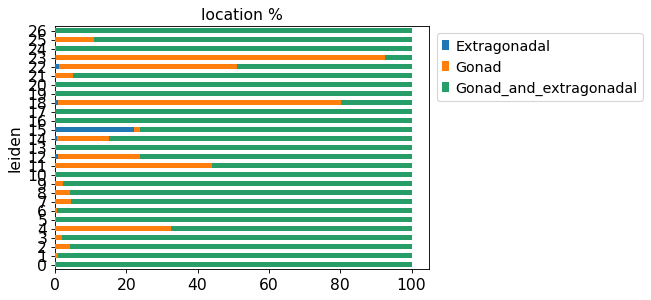

In [34]:
sc.pl.umap(
    adata,
    color=['leiden', 'scrublet_score', 'sex'], legend_loc='on data',
    frameon=True,  wspace = 0.3
)
Barplot('leiden', adata, var='celltype_somaticEarly', height=3)
Barplot('donor', adata, var='leiden', height=4)
Barplot('phase', adata, var='leiden', height=4)
Barplot('sex', adata, var='leiden', height=4)
Barplot('PCW', adata, var='leiden', height=4)
Barplot('location', adata, var='leiden', height=4)

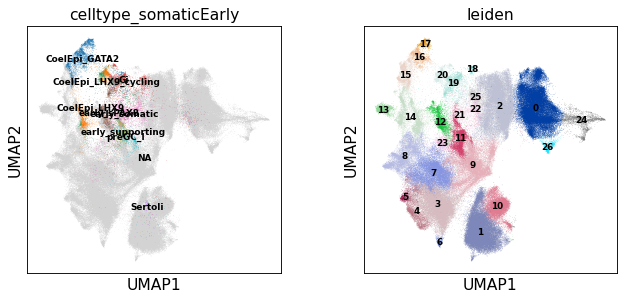

In [35]:
sc.pl.umap(
    adata,
    color=["celltype_somaticEarly", 'leiden'], ncols = 2,
    legend_loc='on data', legend_fontsize=8
)

... storing 'celltype' as categorical


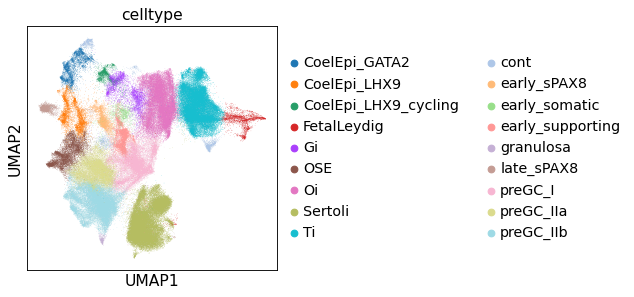

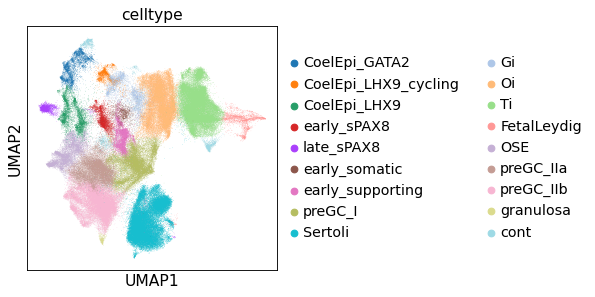

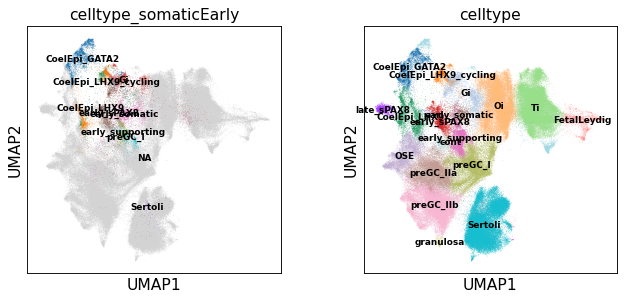

In [36]:
adata.obs['celltype'] = adata.obs['leiden'].tolist()
adata.obs.at[adata.obs['leiden'] == '0', 'celltype'] = 'Ti'
adata.obs.at[adata.obs['leiden'] == '1', 'celltype'] = 'Sertoli'
adata.obs.at[adata.obs['leiden'] == '2', 'celltype'] = 'Oi'
adata.obs.at[adata.obs['leiden'] == '3', 'celltype'] = 'preGC_IIb'
adata.obs.at[adata.obs['leiden'] == '4', 'celltype'] = 'preGC_IIb'
adata.obs.at[adata.obs['leiden'] == '5', 'celltype'] = 'preGC_IIb'
adata.obs.at[adata.obs['leiden'] == '6', 'celltype'] = 'granulosa'
adata.obs.at[adata.obs['leiden'] == '7', 'celltype'] = 'preGC_IIa'
adata.obs.at[adata.obs['leiden'] == '8', 'celltype'] = 'OSE'
adata.obs.at[adata.obs['leiden'] == '9', 'celltype'] = 'preGC_I'
adata.obs.at[adata.obs['leiden'] == '10', 'celltype'] = 'Sertoli'
adata.obs.at[adata.obs['leiden'] == '11', 'celltype'] = 'early_supporting'
adata.obs.at[adata.obs['leiden'] == '12', 'celltype'] = 'early_sPAX8'
adata.obs.at[adata.obs['leiden'] == '13', 'celltype'] = 'late_sPAX8'
adata.obs.at[adata.obs['leiden'] == '14', 'celltype'] = 'CoelEpi_LHX9'
adata.obs.at[adata.obs['leiden'] == '15', 'celltype'] = 'CoelEpi_GATA2'
adata.obs.at[adata.obs['leiden'] == '16', 'celltype'] = 'CoelEpi_GATA2'
adata.obs.at[adata.obs['leiden'] == '17', 'celltype'] = 'cont'
adata.obs.at[adata.obs['leiden'] == '18', 'celltype'] = 'cont'
adata.obs.at[adata.obs['leiden'] == '19', 'celltype'] = 'Gi'
adata.obs.at[adata.obs['leiden'] == '20', 'celltype'] = 'CoelEpi_LHX9_cycling'
adata.obs.at[adata.obs['leiden'] == '21', 'celltype'] = 'early_somatic'
adata.obs.at[adata.obs['leiden'] == '22', 'celltype'] = 'Gi'
adata.obs.at[adata.obs['leiden'] == '23', 'celltype'] = 'cont'
adata.obs.at[adata.obs['leiden'] == '24', 'celltype'] = 'FetalLeydig'
adata.obs.at[adata.obs['leiden'] == '25', 'celltype'] = 'Gi'
adata.obs.at[adata.obs['leiden'] == '26', 'celltype'] = 'cont'
set(adata.obs['celltype'])
sc.pl.umap(adata, color=['celltype'])
adata.obs['celltype'].cat.reorder_categories(['CoelEpi_GATA2', 'CoelEpi_LHX9_cycling','CoelEpi_LHX9',  
                                             'early_sPAX8', 'late_sPAX8', 'early_somatic',  
                                              'early_supporting', 'preGC_I',  'Sertoli', 
                                              'Gi','Oi', 'Ti', 'FetalLeydig',
                                              'OSE', 'preGC_IIa', 'preGC_IIb','granulosa', 
                                            'cont'], inplace=True)

sc.pl.umap(adata, color=['celltype'])
sc.pl.umap(adata, color=['celltype_somaticEarly', 'celltype'], ncols = 2, legend_loc='on data', legend_fontsize=8)

In [37]:
# Refine early somatic clustering
metaM = pd.read_csv(path_to_gonads+'/FCA-gonads_somaticEarly_annotated.csv')
metaM = metaM.set_index('Unnamed: 0')
metaM.head()


cell_annotM = metaM['celltype'].to_dict()
cell_annotF = adata.obs['celltype'].to_dict()
cell_annot = {**cell_annotF, **cell_annotM }
adata.obs['celltype'] = adata.obs_names.map(cell_annot).astype('category')


# Save
adata.obs.to_csv(path_to_gonads+'/FCA-gonads_somatic_annotated.csv')
adata.write(path_to_gonads+'/FCA-gonads_somatic_annotated.h5ad')

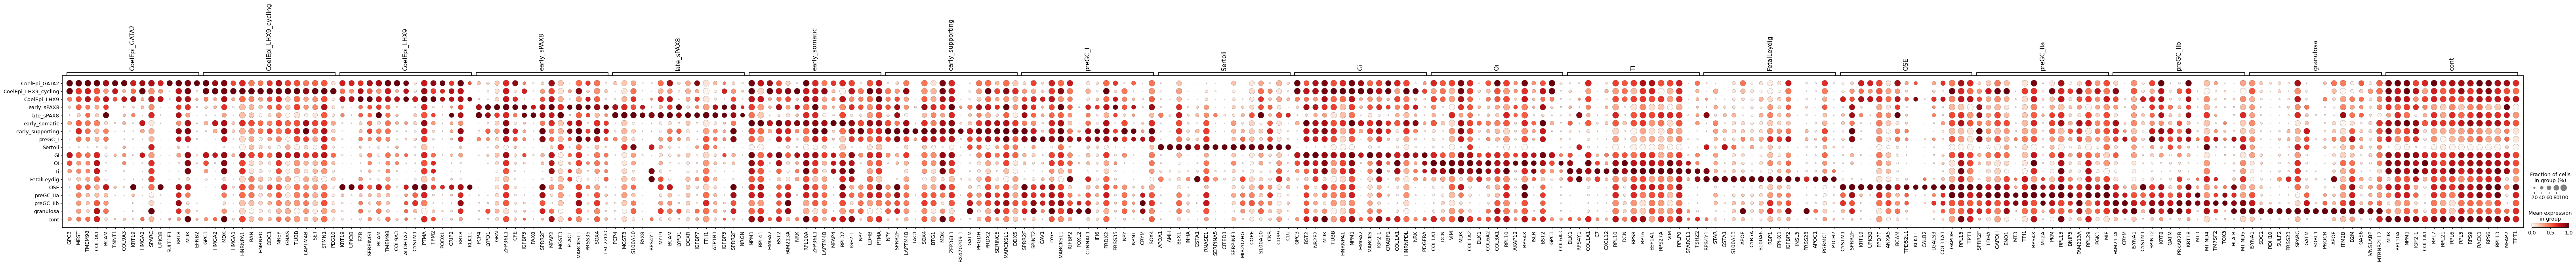

In [38]:
bdata.obs['celltype'] = adata.obs['celltype']
sc.tl.rank_genes_groups(adata, groupby='celltype', use_raw=False) #, method='logreg'
sc.pl.rank_genes_groups_dotplot(adata, n_genes=15, dendrogram=False, use_raw = False, standard_scale = 'var')

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


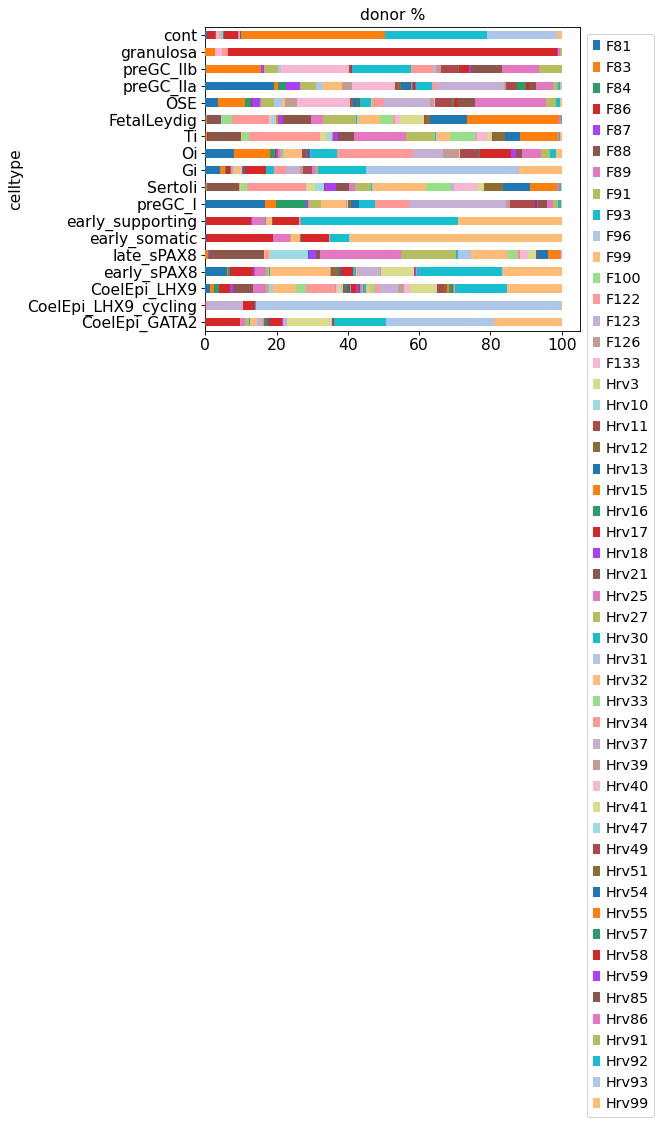

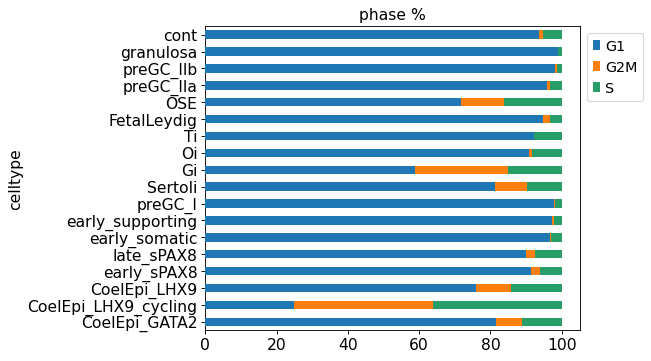

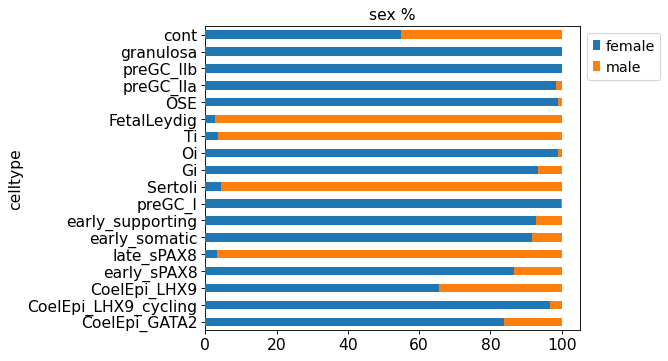

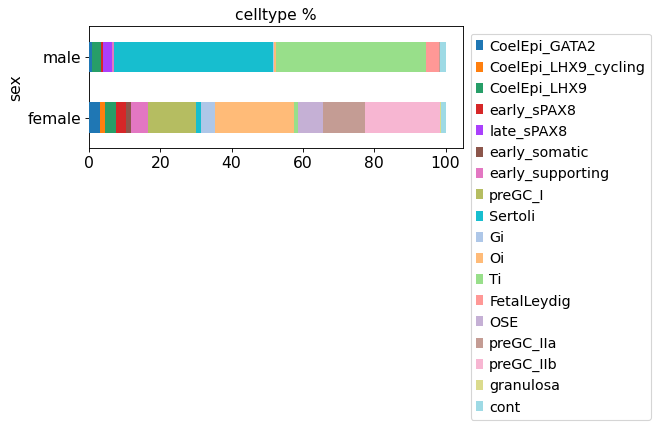

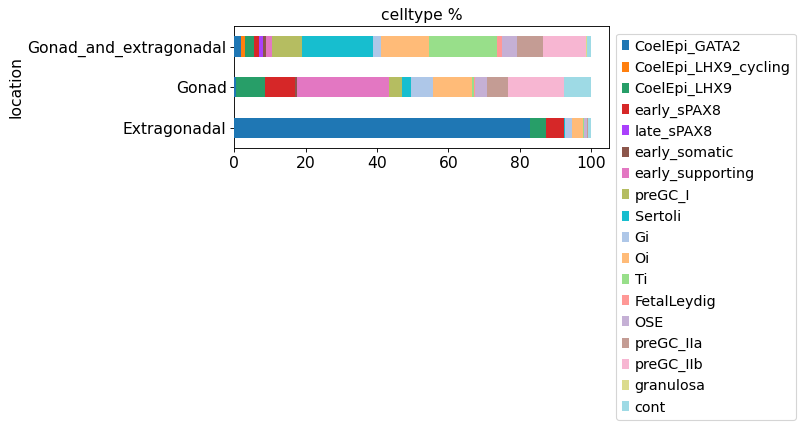

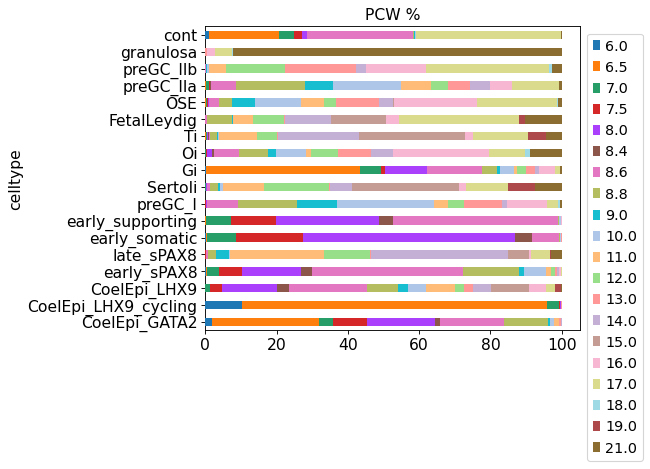

In [40]:
adata = adata[[not i for i in adata.obs.is_doublet]]
# adata = adata[[i > 1000 for i in adata.obs.n_genes]]
Barplot('donor', adata, var='celltype', height=5)
Barplot('phase', adata, var='celltype', height=5)
Barplot('sex', adata, var='celltype', height=5)
Barplot('celltype', adata, var='sex', height=2)
Barplot('celltype', adata, var='location', height=2)
Barplot('PCW', adata, var='celltype', height=5)

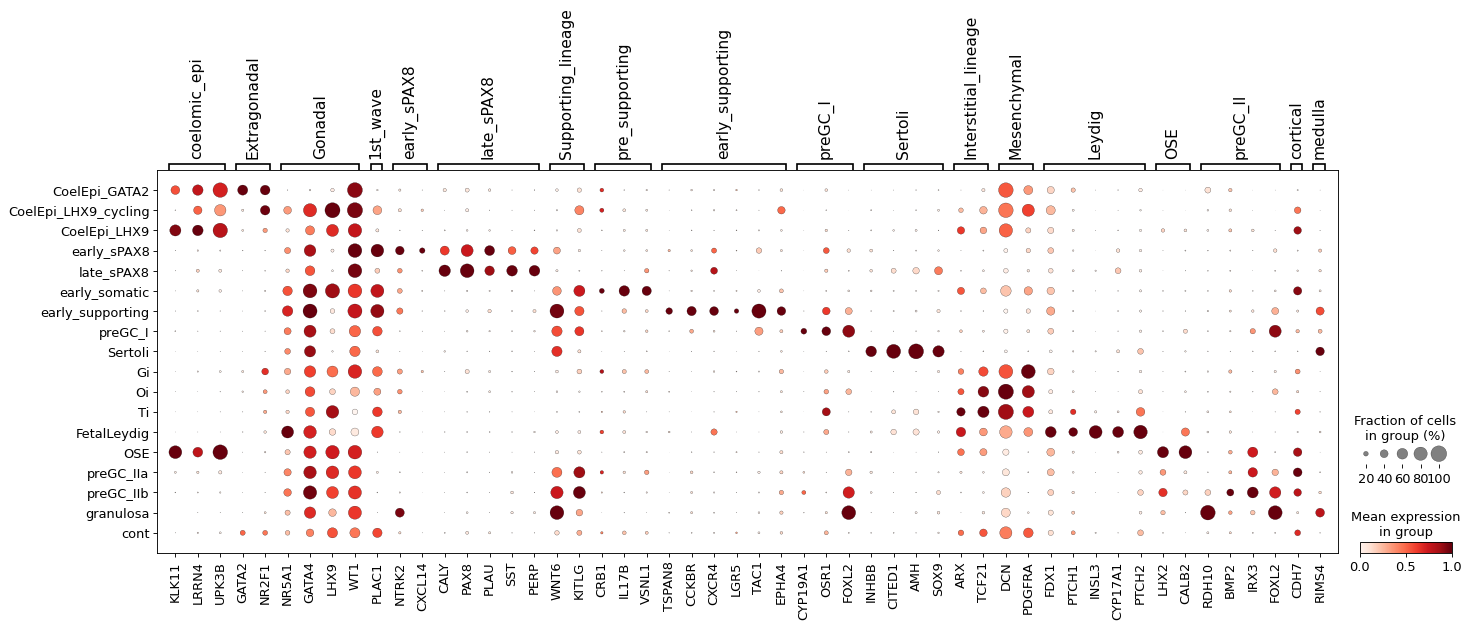

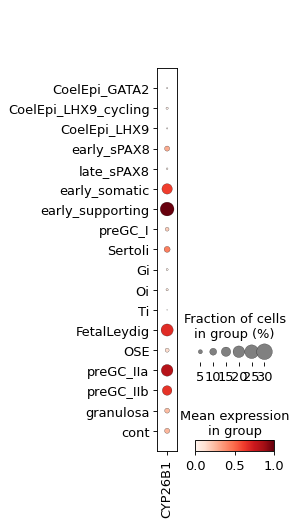

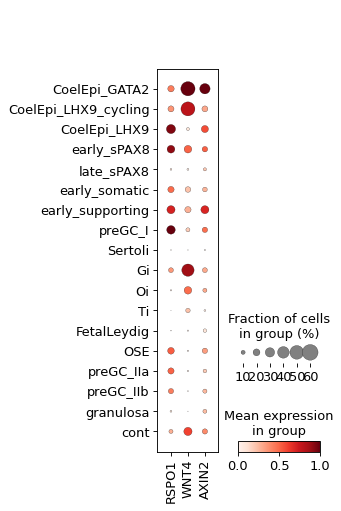

In [47]:
marker_genes = {
    'coelomic_epi': {'LRRN4', 'UPK3B', 'KLK11'},
    'Extragonadal':{'NR2F1', 'GATA2'},
    'Gonadal':{'WT1', 'LHX9', 'GATA4', 'NR5A1'},
    '1st_wave':{'PLAC1'},
    'early_sPAX8': {'NTRK2',  'CXCL14'},
    'late_sPAX8': {'PAX8', 'PLAU', 'PERP', 'CALY', 'SST'},
    'Supporting_lineage':{"WNT6",  'KITLG'},
    'pre_supporting': {'IL17B', 'VSNL1', 'CRB1'},
    'early_supporting':{'LGR5', 'TSPAN8', 'TAC1', 'EPHA4', 'CXCR4','CCKBR'},
    'preGC_I':{'OSR1', 'FOXL2', 'CYP19A1'},
    'Sertoli': {'AMH', 'CITED1',  'INHBB','SOX9'},
    'Interstitial_lineage':{'ARX', 'TCF21'},
    'Mesenchymal':{'DCN', 'PDGFRA'},
    'Leydig':{'FDX1', 'INSL3',  'PTCH1',  'PTCH2', 'CYP17A1'},
    'OSE':{'LHX2', 'CALB2'},
    'preGC_II':{"IRX3", 'BMP2', 'FOXL2',"RDH10"},
    'cortical':{'CDH7'},
    'medulla':{'RIMS4'}
}
sc.pl.dotplot(adata, marker_genes, groupby='celltype', standard_scale = 'var')
sc.pl.dotplot(adata, 'CYP26B1', groupby='celltype', standard_scale = 'var')
sc.pl.dotplot(adata, ['RSPO1', 'WNT4', 'AXIN2'], groupby='celltype', standard_scale = 'var')

... storing 'early_Setoli' as categorical


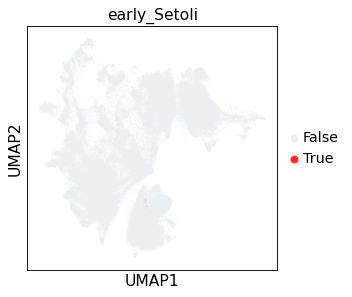

In [48]:
# Locate youngest Sertoli
x = [ i in ['Hrv17'] for i in adata.obs['donor']]
y = [ i in ['Sertoli'] for i in adata.obs['celltype_somaticEarly']]
mask = [all(tup) for tup in zip(x,y)]

adata.obs['early_Setoli'] = [ str(i) for i in mask ]
sc.pl.umap(adata, color=['early_Setoli'], palette=['#ebeff2', '#ff2919'])

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/anndata/_core/anndata.py:1208: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'sex_celltype' as categorical


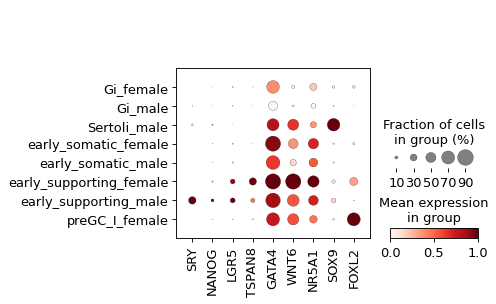

In [49]:
adata.obs['sex_celltype'] = adata.obs.apply(lambda x: '_'.join(x[[ 'celltype', 'sex']]),axis=1)
XX = adata[[ i in ['Sertoli', 'early_somatic', 'early_supporting', 'preGC_I', 'Gi'] for i in adata.obs['celltype']]]
XX = XX[[ i not in ['Sertoli_female', 'preGC_I_male'] for i in XX.obs['sex_celltype']]]
# XX = XX[[ i <= 7.5 for i in XX.obs['PCW']]]
sc.pl.dotplot(XX, ['SRY', 'NANOG', 'LGR5', 'TSPAN8', 'GATA4', 'WNT6', 'NR5A1', 'SOX9', 'FOXL2'], groupby='sex_celltype', standard_scale = 'var')

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/anndata/_core/anndata.py:1208: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'sex_celltype' as categorical


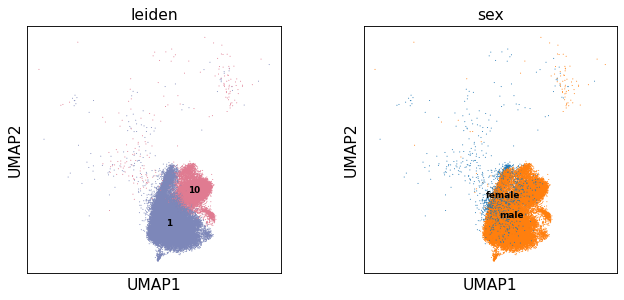

In [50]:
sc.pl.umap(
    adata[[i in 'Sertoli' for i in adata.obs.celltype ]],
    color=["leiden", 'sex'], ncols = 2,
    legend_loc='on data', legend_fontsize=8
)

... storing 'sex_celltype' as categorical


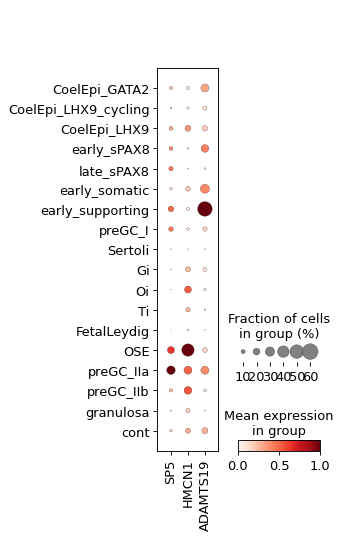

In [51]:
sc.pl.dotplot(adata, ['SP5', 'HMCN1', 'ADAMTS19'], groupby='celltype', standard_scale = 'var')#topgenes_tfIDF

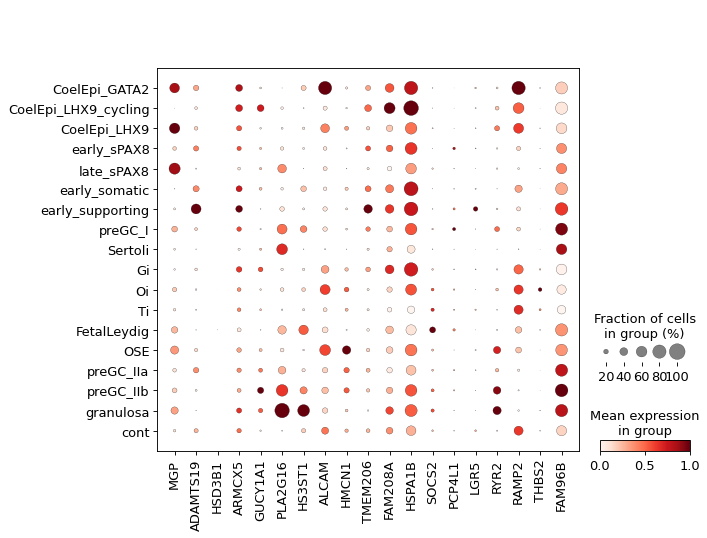

In [52]:
genes =['Mgp',
 'Adamts19',
 'Hsd3b1',
 'Armcx5',
 'Gucy1a1',
 'Pla2g16',
 'Hs3st1',
 'Alcam',
 'Hmcn1',
 'Tmem206',
 'Fam208a',
 'Hspa1b',
 'Socs2',
 'Pcp4l1',
 'Lgr5',
 'Ryr2',
 'Ramp2',
 'Thbs2',
 'Fam96b']

genes = [ i.upper() for i in genes]
sc.pl.dotplot(adata, genes, groupby='celltype', standard_scale = 'var')#topgenes_tfIDF